<a href="https://colab.research.google.com/github/prachimalla14/2508859_PrachiMalla/blob/main/Worksheet11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1 Data Preparation:

Proper data preprocessing is essential for neural networks, as they are sensitive to the scale, type, and quality
of input data.

a. Load the Dataset:

• Import a dataset from a CSV file using pandas.read csv().
b. Handle Missing Values:
• Neural networks cannot handle missing data directly.
• Options:
1. Imputation: Replace missing values using mean, median, mode or a learned imputer.
2. Removal: Drop rows or columns with missing data (only if they are few).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Concept And Technology Of AI/titanic.csv')
print("Dataset shape:", df.shape)
print("First 5 rows:")
print(df.head())

from sklearn.impute import SimpleImputer


X = df.drop('Survived', axis=1)
y = df['Survived']

numeric_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(exclude='number').columns


# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])


# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])


# Different strategies
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent') # For categorical data


df_clean = df.dropna() # Remove rows with any missing values

Dataset shape: (891, 12)
First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0        

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Sample categorical data
colors = ['red', 'blue', 'green', 'red', 'blue']
sizes = ['small', 'medium', 'large', 'medium', 'small']

print("Original colors:", colors)

# Label Encoding - for ordinal data (natural order)
label_encoder = LabelEncoder()
colors_encoded = label_encoder.fit_transform(colors)
print("Label encoded colors:", colors_encoded)
print("Classes learned:", label_encoder.classes_)

# One-Hot Encoding - for nominal data (no natural order)
onehot_encoder = OneHotEncoder(sparse_output=False)
colors_onehot = onehot_encoder.fit_transform(np.array(colors).reshape(-1, 1))
print("One-hot encoded colors shape:", colors_onehot.shape)
print("One-hot encoded:\n", colors_onehot)

# ColumnTransformer - handles different column types automatically
numeric_features = [0, 1]  # indices of numeric columns
categorical_features = [2, 3]  # indices of categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # keep numeric columns as-is
        ('cat', OneHotEncoder(), categorical_features)  # encode categorical
    ]
)

Original colors: ['red', 'blue', 'green', 'red', 'blue']
Label encoded colors: [2 0 1 2 0]
Classes learned: ['blue' 'green' 'red']
One-hot encoded colors shape: (5, 3)
One-hot encoded:
 [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# Sample data with different scales
data = np.array([[100, 0.1], [150, 0.5], [200, 1.0]])
# StandardScaler (mean=0, std=1)
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(data)
# MinMaxScaler (range [0, 1])
minmax_scaler = MinMaxScaler()
data_normalized = minmax_scaler.fit_transform(data)

In [5]:
from sklearn.model_selection import train_test_split


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
X,
y,
test_size=0.2, # 20% for testing
random_state=42, # reproducibility
shuffle=True, # shuffle data before splitting
stratify=y # maintain class distribution (for classification)
)


print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 712 samples
Testing set: 179 samples


In [6]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
# For classification problems
mlp_classifier = MLPClassifier(random_state=42)
# For regression problems
mlp_regressor = MLPRegressor(random_state=42)

In [7]:
# Different network architectures
single_layer = MLPClassifier(hidden_layer_sizes=(50,)) # One hidden layer, 50 neurons
two_layers = MLPClassifier(hidden_layer_sizes=(100, 50)) # Two hidden layers: 100 50
deep_network = MLPClassifier(hidden_layer_sizes=(100, 50, 25)) # Three hidden layers
wide_network = MLPClassifier(hidden_layer_sizes=(200,)) # One wide hidden layer

In [8]:
# Different activation functions
relu_model = MLPClassifier(activation='relu') # Rectified Linear Unit (default)
sigmoid_model = MLPClassifier(activation='logistic') # Sigmoid function
tanh_model = MLPClassifier(activation='tanh') # Hyperbolic tangent
print("ReLU activation:", relu_model.activation)

ReLU activation: relu


In [9]:
# Different optimization algorithms
adam_solver = MLPClassifier(solver='adam') # Adaptive Moment Estimation (default)
sgd_solver = MLPClassifier(solver='sgd') # Stochastic Gradient Descent
lbfgs_solver = MLPClassifier(solver='lbfgs') # Limited-memory BFGS
# SGD with specific learning rate
sgd_tuned = MLPClassifier(solver='sgd', learning_rate_init=0.01)

In [10]:
from sklearn.neural_network import MLPClassifier

# Comprehensive model configuration
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),     # Network architecture: two hidden layers
    activation='relu',                # Activation function
    solver='adam',                    # Optimization algorithm
    alpha=0.001,                      # L2 regularization strength
    learning_rate_init=0.001,         # Initial learning rate
    max_iter=1000,                     # Maximum training iterations
    random_state=42,                  # Reproducible results
    early_stopping=True,              # Stop if no improvement
    validation_fraction=0.1,          # Validation set size
    n_iter_no_change=10               # Patience for early stopping
)

In [11]:
from sklearn.preprocessing import StandardScaler

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train[numeric_features].copy()
X_test_scaled = X_test[numeric_features].copy()


X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)


print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Scaled training data shape: (712, 6)
Scaled testing data shape: (179, 6)


In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
y_pred_proba = mlp.predict_proba(X_test_scaled)

print("Predicted labels shape:", y_pred.shape)
print("True labels shape:", y_test.shape)
print("\nFirst 5 predictions vs actual:")
print("Actual:   ", y_test[:5])
print("Predicted:", y_pred[:5])

Predicted labels shape: (179,)
True labels shape: (179,)

First 5 predictions vs actual:
Actual:    565    0
160    0
553    1
860    0
241    1
Name: Survived, dtype: int64
Predicted: [0 0 0 0 0]


Test Accuracy: 0.6760 (67.60%)

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.70      0.84      0.76       110
    Survived       0.62      0.42      0.50        69

    accuracy                           0.68       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.67      0.68      0.66       179



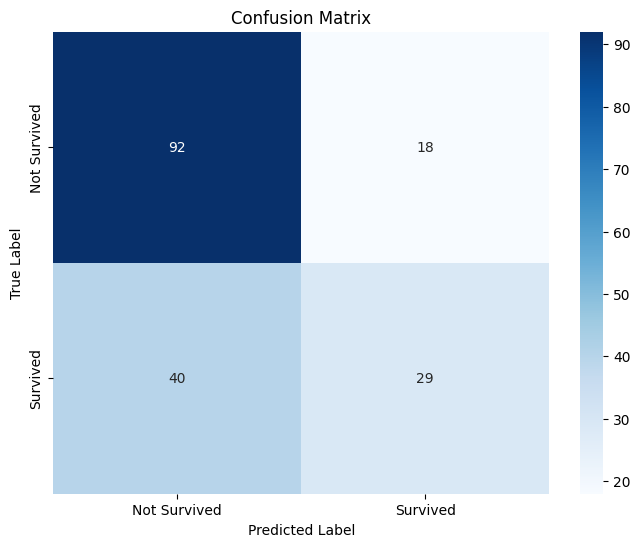

Precision: 0.6662, Recall: 0.6760, F1-score: 0.6600


In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names (for Titanic: 0 = Not Survived, 1 = Survived)
class_names = ['Not Survived', 'Survived']

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Additional metrics for binary/multi-class classification
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Mean Squared Error (MSE): 0.3240
Root Mean Squared Error (RMSE): 0.5692
Mean Absolute Error (MAE): 0.3240
R-squared (R) Score: -0.3679


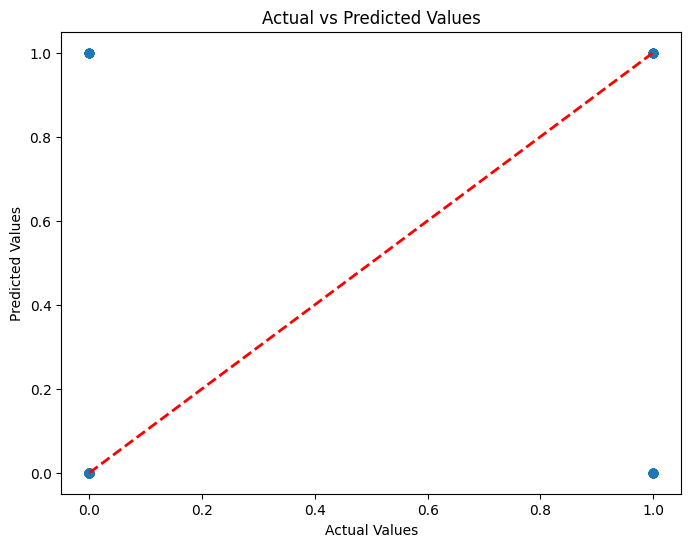

Text(0.5, 1.0, 'Residual')

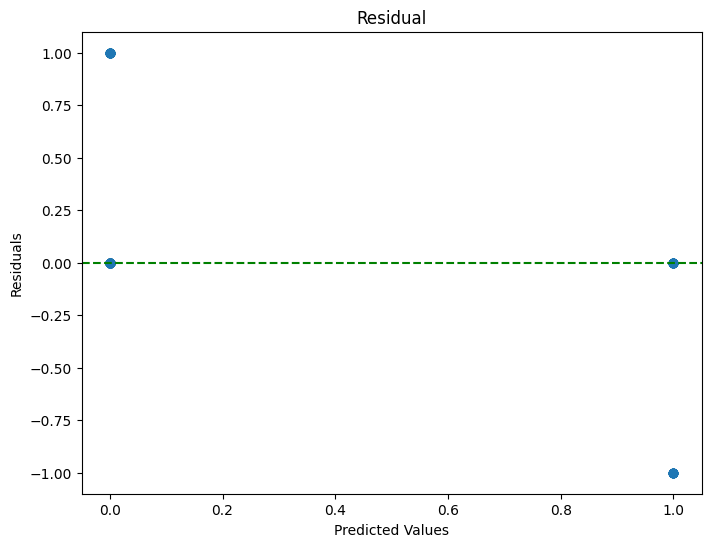

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R) Score: {r2:.4f}")
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual')

c. Encode Categorical Features:

• Neural networks require numerical inputs. Convert categorical variables:

– One-Hot Encoding: Use OneHotEncoder to create dummy variables for nominal categories (e.g.,
”red”, ”blue”, ”green”).

– Label Encoding: Use LabelEncoder when categories have a natural order (e.g., ”low”, ”medium”,
”high”).

In [17]:
# Features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (712, 11)
Testing set shape: (179, 11)


In [19]:
from sklearn.preprocessing import StandardScaler
# Select only numeric columns for scaling
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]


# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)

Scaler mean: [4.44405899e+02 2.30898876e+00 2.98076870e+01 4.92977528e-01
 3.90449438e-01 3.18198263e+01]
Scaler scale: [257.28465877   0.83297766  14.47260957   1.05997462   0.83754512
  48.02534305]


In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_features]
X_test_numeric = X_test[numeric_features]

imputer = SimpleImputer(strategy='mean')
X_train_filled = imputer.fit_transform(X_train_numeric)
X_test_filled = imputer.transform(X_test_numeric)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.transform(X_test_filled)

print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Two hidden layers
    activation='relu',            # ReLU activation
    solver='adam',                # Adam optimizer
    max_iter=1000,                 # Max iterations
    random_state=42               # For reproducibility
)

mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")


Scaler mean: [7.22090629e+00 3.39995190e-01 3.18164326e-01 5.47586107e+00
 5.59630556e-02 3.05479123e+01 1.15964018e+02 9.94740746e-01
 3.21874158e+00 5.31727920e-01 1.04754628e+01]
Scaler scale: [1.28603765e+00 1.65745280e-01 1.46455451e-01 4.78506792e+00
 3.44965074e-02 1.76453423e+01 5.67329111e+01 3.01115428e-03
 1.60694190e-01 1.46758368e-01 1.18875484e+00]
Training completed in 256 iterations
Final training loss: 0.8236
Training set accuracy: 0.6612
Model converged successfully.


In [45]:
y_pred = mlp.predict(X_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test)}")
print(f"Number of correct predictions: {sum(y_pred == y_test)}")

Test Accuracy: 0.5677 (56.77%)
Number of test samples: 1300
Number of correct predictions: 738


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       110
           1       0.56      0.42      0.48        69

    accuracy                           0.65       179
   macro avg       0.62      0.61      0.61       179
weighted avg       0.64      0.65      0.64       179



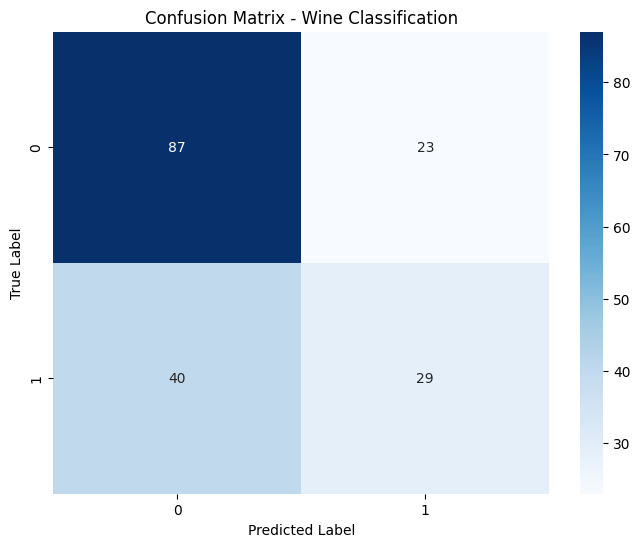

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Wine Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

Weighted Precision: 0.6360
Weighted Recall: 0.6480
Weighted F1-Score: 0.6359


3 Exercise 1 - Predicting Wine Quality using MLP.

3.1 Objective:

Build, train, and evaluate a Multi-Layer Perceptron (MLP) neural network to classify wine quality based on
physicochemical properties.

3.2 Part 1: Data Preparation:

1.1 Load and Explore the Dataset:

In [29]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Concept And Technology Of AI/kaggle/archive (2)/wine_quality_merged.csv")

# Display the first 5 rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Check the distribution of the target variable (quality)
print(df['quality'].value_counts().sort_index())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

3.3 Part 2: Model Definition and Training








Task 2.1: Create and Configure MLP Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (5197, 13)
Testing set shape: (1300, 13)


In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

print("Model architecture:", mlp.hidden_layer_sizes)
print("Activation function:", mlp.activation)
print("Solver:", mlp.solver)
print("Maximum iterations:", mlp.max_iter)

Model architecture: (50, 25)
Activation function: relu
Solver: adam
Maximum iterations: 1000


In [40]:
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")

Training completed in 708 iterations
Final training loss: 0.6782
Training set accuracy: 0.7345
Model converged successfully.


4 Part 3: Model Evaluation

Task 3.1: Make Predictions and Calculate Basic Metrics

In [38]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test)}")
print(f"Number of correct predictions: {sum(y_pred == y_test)}")

Test Accuracy: 0.5615 (56.15%)
Number of test samples: 1300
Number of correct predictions: 730


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.12      0.15        43
           5       0.62      0.60      0.61       428
           6       0.57      0.59      0.58       567
           7       0.46      0.56      0.51       216
           8       0.50      0.23      0.32        39
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.34      0.30      0.31      1300
weighted avg       0.55      0.56      0.55      1300



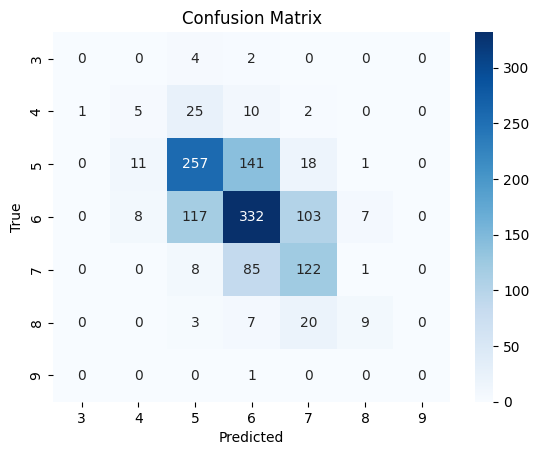


Weighted Precision: 0.5533
Weighted Recall: 0.5577
Weighted F1-Score: 0.5526


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = mlp.predict(X_test_scaled)
class_names = sorted(y.unique())

print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=[str(c) for c in class_names],
    zero_division=0
))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(c) for c in class_names],
            yticklabels=[str(c) for c in class_names])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"\nWeighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")
